### Creating and Persisting an ML Model

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/student-mat.csv', sep=';')

Summary of the data

In [89]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [90]:
df.head

<bound method NDFrame.head of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freet

Create a subset of features as an example.

In [2]:
include = ['G1', 'G2','failures', 'studytime', 'G3']
df.drop(columns=df.columns.difference(include), inplace=True)  # only using 4 features

In [92]:
df.info

<bound method DataFrame.info of      studytime  failures  G1  G2  G3
0            2         0   5   6   6
1            2         0   5   5   6
2            2         3   7   8  10
3            3         0  15  14  15
4            2         0   6  10  10
..         ...       ...  ..  ..  ..
390          2         2   9   9   9
391          1         0  14  16  16
392          1         3  10   8   7
393          1         0  11  12  10
394          1         0   8   9   9

[395 rows x 5 columns]>

The goal is to predict the quality of the student. We will build a predictor based on the final grade (G3).
Becasue we are trying to find quality students. In this model we define a quality student as one who achieves a final grade of 15 or higher. 

In [3]:
df['qual_student'] = np.where(df['G3']>=15, 1, 0)

In [4]:
df.describe()

,studytime,failures,G1,G2,G3,qual_student
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,2.035443,0.334177,10.908861,10.713924,10.415190,0.184810
std,0.839240,0.743651,3.319195,3.761505,4.581443,0.388636
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,8.000000,9.000000,8.000000,0.000000
50%,2.000000,0.000000,11.000000,11.000000,11.000000,0.000000
75%,2.000000,0.000000,13.000000,13.000000,14.000000,0.000000
max,4.000000,3.000000,19.000000,19.000000,20.000000,1.000000


Drop the G3 score

In [5]:
include = ['G1', 'G2', 'failures', 'studytime', 'qual_student']
df.drop(columns=df.columns.difference(include), inplace=True)

### Import scikit-learn and build a random forest classifer

### To-do: Cross Validation 

In [6]:
import sklearn
from sklearn.ensemble import RandomForestClassifier as rf

dependent_variable = 'qual_student'
x = df[df.columns.difference([dependent_variable])]
y = df[dependent_variable]

In [45]:
df['G2_qual'] = np.where(df['G2']>=15, 1, 0)
df.groupby(['G2_qual']).count()['G1']

G2_qual
0    328
1     67
Name: G1, dtype: int64

In [46]:

df.groupby(['qual_student','G2_qual']).count()['G1']

qual_student  G2_qual
0             0          321
              1            1
1             0            7
              1           66
Name: G1, dtype: int64

In [49]:
df['G1_qual'] = np.where(df['G1']>=15, 1, 0)
df.groupby(['qual_student','G1_qual']).count()['G2']

qual_student  G1_qual
0             0          311
              1           11
1             0           19
              1           54
Name: G2, dtype: int64

array([<AxesSubplot:ylabel='0'>, <AxesSubplot:ylabel='1'>], dtype=object)

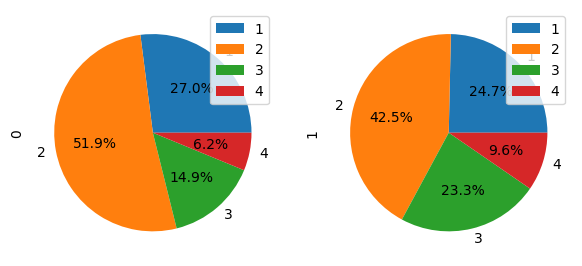

In [99]:
#df['study_qual'] = np.where(df['studytime']>=3, 1, 0)
df.groupby(['qual_student','studytime']).count()['G2'].unstack(level=0).plot(
    kind='pie',
    stacked=False,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(7, 7),
    legend=True,
    )

In [57]:
# df['fail_qual'] = np.where(df['failures']>=2, 0, 1)
df.groupby(['qual_student','failures']).count()['G2']

qual_student  failures
0             0           241
              1            49
              2            16
              3            16
1             0            71
              1             1
              2             1
Name: G2, dtype: int64

#### Split into train and test set

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # create 70/30 split for training and testing
clf = rf(n_estimators = 1000, random_state = 6)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9663865546218487

#### Predict with the model

In [61]:
pred = clf.predict(x_test)
# sklearn.metrics.f1_score(y_test, pred, average='binary')


In [72]:
# pred = 1 and != y_test, 1 := it's false positive
positives = pred
false_positives = np.where(pred ==1, (np.where(pred != y_test, 1, 0)), 0)
# pred = 0 and != y_test
negatives = np.where(pred ==1, 0, 1)
false_negatives = np.where(pred ==0, (np.where(pred != y_test, 1, 0)), 0)

testdf = pd.DataFrame()
testdf['count'] = pred
# testdf['false_positives'] = false_positives
testdf['false_negatives'] = false_negatives


In [71]:
# show distribution in false positives
testdf.groupby(['false_positives']).count()

,count
false_positives,
0,115
1,4


In [73]:
# show distribution in false negatives
testdf.groupby(['false_negatives']).count()

,count
false_negatives,
0,119


Let's export this model so we can use it in a microservice (flask api)

In [99]:
import joblib
# modify the file path to where you want to save the model
joblib.dump(clf, 'app/handlers/model.pkl')

['app/handlers/model.pkl']

In [100]:
query_df = pd.DataFrame({ 'G1' : pd.Series(14), 'G2' : pd.Series(15), 'studytime' : pd.Series(4), 'failures' : pd.Series(0) })

In [101]:
pred = clf.predict(query_df)

/Users/joanne/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [102]:
pred

array([1])

In [103]:
type(x)

pandas.core.frame.DataFrame